In [1]:
import pandas as pd


In [3]:
train_df = pd.read_csv("/Users/renchulaji/Desktop/Data Science/train_LZdllcl.csv")
test_df = pd.read_csv("/Users/renchulaji/Desktop/Data Science/test_2umaH9m.csv")

In [4]:
train_info = train_df.info()
test_info = test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
<class 'panda

In [6]:
train_head = train_df.head()
test_head = test_df.head()

In [7]:
train_nulls = train_df.isnull().sum()
test_nulls = test_df.isnull().sum()

In [8]:
train_df.shape, test_df.shape, train_df.columns, test_df.columns

((54808, 14),
 (23490, 13),
 Index(['employee_id', 'department', 'region', 'education', 'gender',
        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
        'length_of_service', 'KPIs_met >80%', 'awards_won?',
        'avg_training_score', 'is_promoted'],
       dtype='object'),
 Index(['employee_id', 'department', 'region', 'education', 'gender',
        'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
        'length_of_service', 'KPIs_met >80%', 'awards_won?',
        'avg_training_score'],
       dtype='object'))

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set(style="whitegrid")

In [11]:
target_dist = train_df['is_promoted'].value_counts(normalize=True)


In [12]:
cat_summary = {
    'department': train_df['department'].value_counts(),
    'region': train_df['region'].value_counts().head(5),
    'education': train_df['education'].value_counts(),
    'gender': train_df['gender'].value_counts(),
    'recruitment_channel': train_df['recruitment_channel'].value_counts()
}

In [13]:
num_summary = train_df.describe()


In [14]:
correlation = train_df.corr(numeric_only=True)


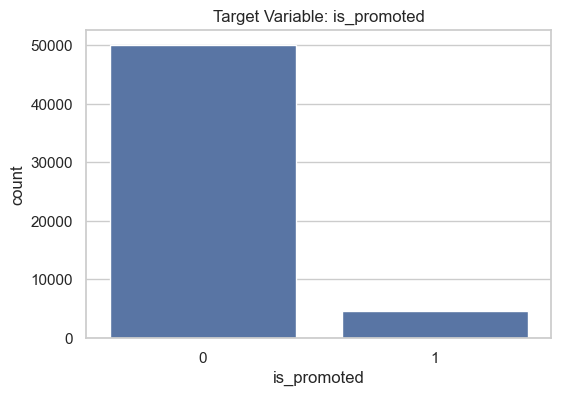

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_promoted', data=train_df)
plt.title("Target Variable: is_promoted")
plt.show()

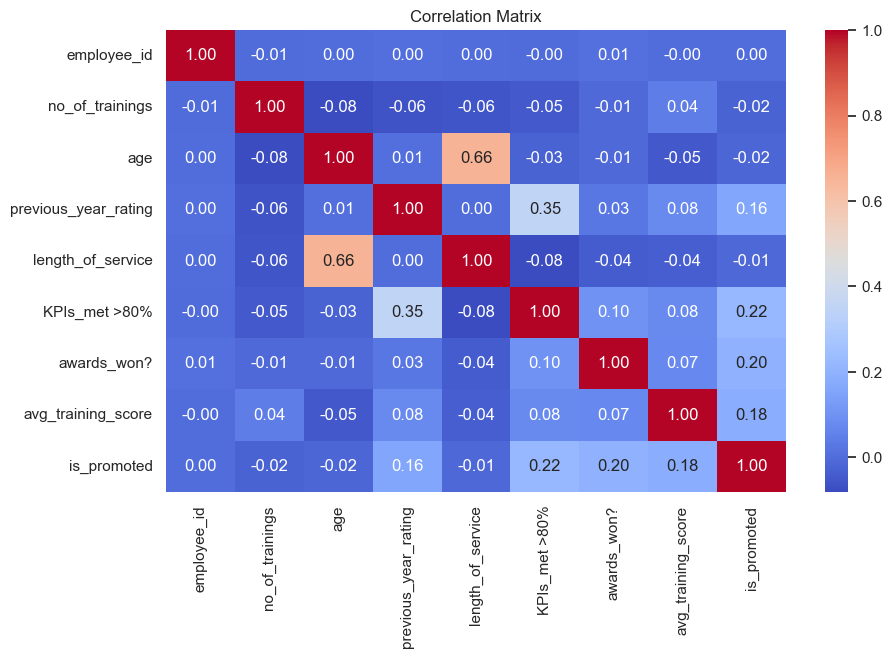

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [17]:
target_dist, cat_summary, num_summary[['age', 'length_of_service', 'avg_training_score']]


(is_promoted
 0    0.91483
 1    0.08517
 Name: proportion, dtype: float64,
 {'department': department
  Sales & Marketing    16840
  Operations           11348
  Technology            7138
  Procurement           7138
  Analytics             5352
  Finance               2536
  HR                    2418
  Legal                 1039
  R&D                    999
  Name: count, dtype: int64,
  'region': region
  region_2     12343
  region_22     6428
  region_7      4843
  region_15     2808
  region_13     2648
  Name: count, dtype: int64,
  'education': education
  Bachelor's          36669
  Master's & above    14925
  Below Secondary       805
  Name: count, dtype: int64,
  'gender': gender
  m    38496
  f    16312
  Name: count, dtype: int64,
  'recruitment_channel': recruitment_channel
  other       30446
  sourcing    23220
  referred     1142
  Name: count, dtype: int64},
                 age  length_of_service  avg_training_score
 count  54808.000000       54808.000000        

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
X_train = train_df.drop(['is_promoted', 'employee_id'], axis=1)
y_train = train_df['is_promoted']
X_test = test_df.drop(['employee_id'], axis=1)

In [20]:
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [21]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [22]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [23]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [24]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [25]:
X_train_processed.shape, X_test_processed.shape


((54808, 58), (23490, 58))

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score

In [33]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_processed, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [34]:
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_tr, y_tr)
y_pred_log = logreg.predict(X_val)
f1_log = f1_score(y_val, y_pred_log)

In [35]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_tr, y_tr)
y_pred_rf = rf.predict(X_val)
f1_rf = f1_score(y_val, y_pred_rf)

In [36]:
f1_log, f1_rf

(0.37371763556424037, 0.428343949044586)

In [37]:
test_predictions = rf.predict(X_test_processed)

In [38]:
submission_df = pd.DataFrame({
    'employee_id': test_df['employee_id'],
    'is_promoted': test_predictions
})

In [40]:
submission = "/Users/renchulaji/Desktop/Data Science/submission_rf.csv"
submission_df.to_csv(submission, index=False)

In [41]:
submission

'/Users/renchulaji/Desktop/Data Science/submission_rf.csv'